# Autofig Mega-Example

In [1]:
import autofig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
autofig.inline()

In [3]:
n = 75
x = np.linspace(0, 4*np.pi, n)

y1 = np.sin(x)
y2 = -np.sin(x)

z1 = np.cos(x)
z2 = -2*np.cos(x)

yerr = np.random.rand(n)*0.3
zerr = np.random.rand(n)

## Plotting in Autofig

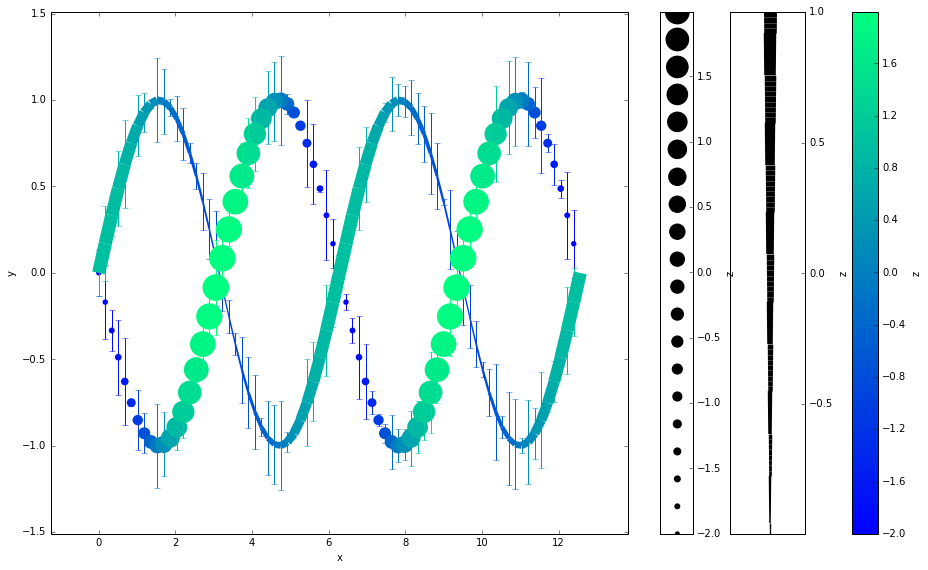

In [4]:
autofig.reset()
plt.gcf().set_size_inches(14,8)
autofig.plot(x, y1, z1, i='x', 
             xlabel='x', ylabel='y', 
             yerror=yerr, 
             c=z1, cmap='winter', clabel='z', 
             s=z1, smap=(0.01, 0.1), slabel='z', 
             marker='none', linestyle='solid',
             highlight_marker='s', highlight_linestyle='dashed')

autofig.plot(x, y2, z2, i='x', 
             xlabel='x', ylabel='y', 
             yerror=yerr, 
             c=z2, cmap='winter', clabel='z', 
             s=z2, smap=(0.01, 0.05), slabel='z', 
             marker='o', linestyle='none',
             uncover=True)

autofig.draw(show=True, save='megaexample.png')

## Replicating in Matplotlib

In [5]:
%matplotlib inline

We'll replicated everything except highlight and uncover (which require interpolation at the given value) and zorder (which requires looping through each point and setting a re-scaled z-order)

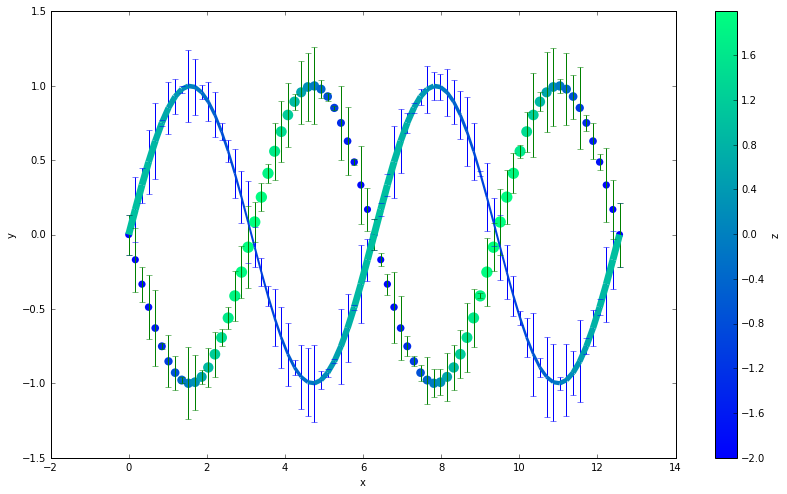

In [6]:
from matplotlib.collections import LineCollection

fig = plt.figure(figsize=(14,8))

# both sizes need their own normalization
s1norm = plt.Normalize(min(z1), max(z1))
s2norm = plt.Normalize(min(z2), max(z2))

# need to manually map s1 onto a reasonable linewidth range (we'll skip converting from axes/figure units)
s1 = s1norm(z1)*5+2

# need to manually map s2 onto a reasonable markersize range (we'll skip converting from axes/figure units)
s2 = s2norm(z2)*80+50

# both colorscales need to follow the SAME normalization
cmin, cmax = np.min([z1, z2]), np.max([z1, z2])
cnorm = plt.Normalize(cmin, cmax)

# plot both sets of errorbars... we'd have to loop to make the colors match
plt.errorbar(x, y1, yerr=yerr, linestyle='none')
plt.errorbar(x, y2, yerr=yerr, linestyle='none')

# handle the line changing color and width
points = np.array([x, y1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, norm=cnorm, cmap='winter', linewidths=s1)
lc.set_array(z1)
plt.gca().add_collection(lc)


# handle the markers changing color and markersize
# for some reason, we don't want to pass the normalized colors to scatter
# even though we had to send norm to LineCollection
plt.scatter(x, y2, s=s2, c=z2, cmap='winter', edgecolors='none')


# make the sidebars
plt.colorbar(label='z')
# we need to manually force the colorbar to use the same normalization that we used
plt.clim(cmin, cmax)


# label the axes
plt.xlabel('x')
plt.ylabel('y')